# Random forest regressor 
This code is an implementation of a Random Forest Regressor for predicting the "world_rank" column of a given dataset.

In [ ]:
#Importing necessary liabraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [ ]:
data=pd.read_csv('cwurData.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB
None


# Data Cleaning
Will clean the data to drop unnecessary columns and analyse null values

In [ ]:
data.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           NaN        5  100.00  2012  
1            12          4          4           NaN        1   91.67  2012  
2             4          2          2           NaN       15   89.50  2012  
3            16         16         11           NaN       50   86.17  2012  
4            37         22         22           NaN       18   85.21  2012

In [ ]:
data.isna().any()

world_rank              False
institution             False
country                 False
national_rank           False
quality_of_education    False
alumni_employment       False
quality_of_faculty      False
publications            False
influence               False
citations               False
broad_impact             True
patents                 False
score                   False
year                    False
dtype: bool

In [ ]:
data.describe()

world_rank  national_rank  quality_of_education  alumni_employment  \
count  2200.000000    2200.000000           2200.000000        2200.000000   
mean    459.590909      40.278182            275.100455         357.116818   
std     304.320363      51.740870            121.935100         186.779252   
min       1.000000       1.000000              1.000000           1.000000   
25%     175.750000       6.000000            175.750000         175.750000   
50%     450.500000      21.000000            355.000000         450.500000   
75%     725.250000      49.000000            367.000000         478.000000   
max    1000.000000     229.000000            367.000000         567.000000   

       quality_of_faculty  publications    influence    citations  \
count         2200.000000   2200.000000  2200.000000  2200.000000   
mean           178.888182    459.908636   459.797727   413.417273   
std             64.050885    303.760352   303.331822   264.366549   
min              1.000000      1.000000     1.000000     1.000000   
25%            175.750000    175.750000   175.750000   161.000000   
50%            210.000000    450.500000   450.500000   406.000000   
75%            218.000000    725.000000   725.250000   645.000000   
max            218.000000   1000.000000   991.000000   812.000000   

       broad_impact      patents        score         year  
count   2000.000000  2200.000000  2200.000000  2200.000000  
mean     496.699500   433.346364    47.798395  2014.318182  
std      286.919755   273.996525     7.760806     0.762130  
min        1.000000     1.000000    43.360000  2012.000000  
25%      250.500000   170.750000    44.460000  2014.000000  
50%      496.000000   426.000000    45.100000  2014.000000  
75%      741.000000   714.250000    47.545000  2015.000000  
max     1000.000000   871.000000   100.000000  2015.000000

<ipython-input-8-81769927c71c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

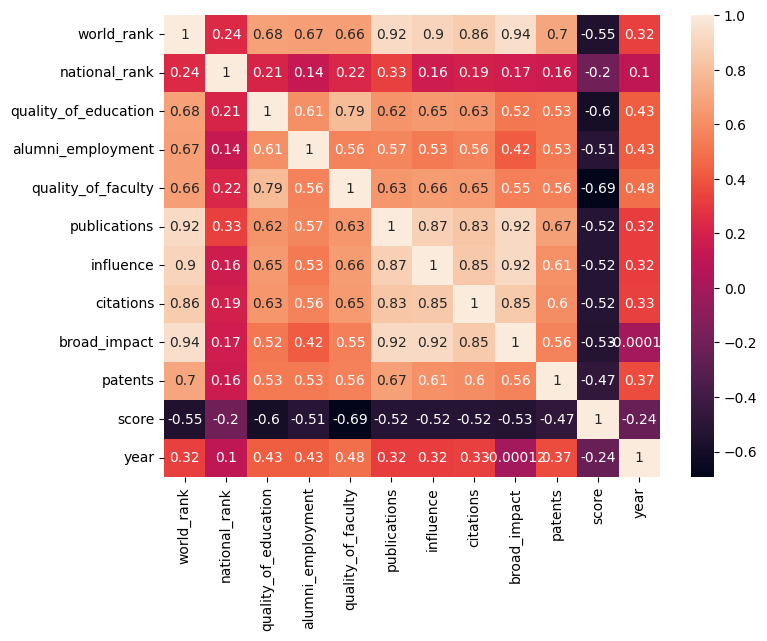

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)

It indicates **Strong correlation between: publications, influnece, citations and broad_impact with the World rank**

In [ ]:
dataF=data.copy()
df=data.copy()

In [ ]:
#filling NaN values on broad_impact with the mean of broad impact
dataF['broad_impact'] = dataF['broad_impact'].fillna(dataF['broad_impact'].mean())
df['broad_impact'] = df['broad_impact'].fillna(df['broad_impact'].mean())

print('Does some data have missing values?: \n'+str(dataF.isnull().any()))

Does some data have missing values?: 
world_rank              False
institution             False
country                 False
national_rank           False
quality_of_education    False
alumni_employment       False
quality_of_faculty      False
publications            False
influence               False
citations               False
broad_impact            False
patents                 False
score                   False
year                    False
dtype: bool




---



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
encoder = LabelEncoder()
df['country'] = encoder.fit_transform(df['country'])
#removing unnecesary data
df.drop('institution', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)
scaler = StandardScaler()
df.head()

world_rank  country  national_rank  quality_of_education  \
0           1       54              1                     7   
1           2       54              2                     9   
2           3       54              3                    17   
3           4       57              1                    10   
4           5       54              4                     2   

   alumni_employment  quality_of_faculty  publications  influence  citations  \
0                  9                   1             1          1          1   
1                 17                   3            12          4          4   
2                 11                   5             4          2          2   
3                 24                   4            16         16         11   
4                 29                   7            37         22         22   

   broad_impact  patents   score  
0      496.6995        5  100.00  
1      496.6995        1   91.67  
2      496.6995       15   89.50  
3      496.6995       50   86.17  
4      496.6995       18   85.21

In [ ]:
#split the data set
scaler = StandardScaler()
y = df['world_rank']
X = df.drop('world_rank', axis=1)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=101)

In [ ]:
dataF.corr()

<ipython-input-13-8bc4de681794>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataF.corr()


world_rank  national_rank  quality_of_education  \
world_rank              1.000000       0.238553              0.676166   
national_rank           0.238553       1.000000              0.211975   
quality_of_education    0.676166       0.211975              1.000000   
alumni_employment       0.668529       0.135342              0.606421   
quality_of_faculty      0.663864       0.222833              0.786181   
publications            0.923037       0.326857              0.624657   
influence               0.895871       0.161086              0.645641   
citations               0.856573       0.186797              0.630455   
broad_impact            0.853083       0.170417              0.435879   
patents                 0.698214       0.159440              0.528120   
score                  -0.549098      -0.199756             -0.600541   
year                    0.320844       0.102951              0.427732   

                      alumni_employment  quality_of_faculty  publications  \
world_rank                     0.668529            0.663864      0.923037   
national_rank                  0.135342            0.222833      0.326857   
quality_of_education           0.606421            0.786181      0.624657   
alumni_employment              1.000000            0.558618      0.572096   
quality_of_faculty             0.558618            1.000000      0.634423   
publications                   0.572096            0.634423      1.000000   
influence                      0.527382            0.656406      0.874952   
citations                      0.559200            0.652186      0.829912   
broad_impact                   0.371666            0.428516      0.831680   
patents                        0.528219            0.555107      0.671558   
score                         -0.510374           -0.693540     -0.522111   
year                           0.427710            0.484788      0.318245   

                      influence  citations  broad_impact   patents     score  \
world_rank             0.895871   0.856573      0.853083  0.698214 -0.549098   
national_rank          0.161086   0.186797      0.170417  0.159440 -0.199756   
quality_of_education   0.645641   0.630455      0.435879  0.528120 -0.600541   
alumni_employment      0.527382   0.559200      0.371666  0.528219 -0.510374   
quality_of_faculty     0.656406   0.652186      0.428516  0.555107 -0.693540   
publications           0.874952   0.829912      0.831680  0.671558 -0.522111   
influence              1.000000   0.845207      0.830123  0.611811 -0.522837   
citations              0.845207   1.000000      0.769196  0.598728 -0.522438   
broad_impact           0.830123   0.769196      1.000000  0.508507 -0.430408   
patents                0.611811   0.598728      0.508507  1.000000 -0.474810   
score                 -0.522837  -0.522438     -0.430408 -0.474810  1.000000   
year                   0.318298   0.328771     -0.000077  0.368570 -0.239136   

                          year  
world_rank            0.320844  
national_rank         0.102951  
quality_of_education  0.427732  
alumni_employment     0.427710  
quality_of_faculty    0.484788  
publications          0.318245  
influence             0.318298  
citations             0.328771  
broad_impact         -0.000077  
patents               0.368570  
score                -0.239136  
year                  1.000000

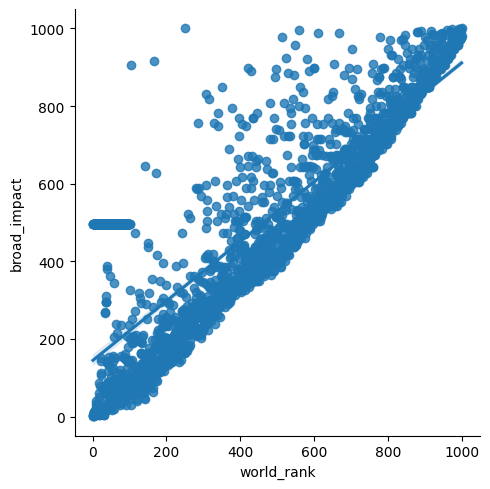

In [ ]:
sns.lmplot(x='world_rank', y='broad_impact',data=dataF)

<ipython-input-15-5607b2ea34bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataF.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f');


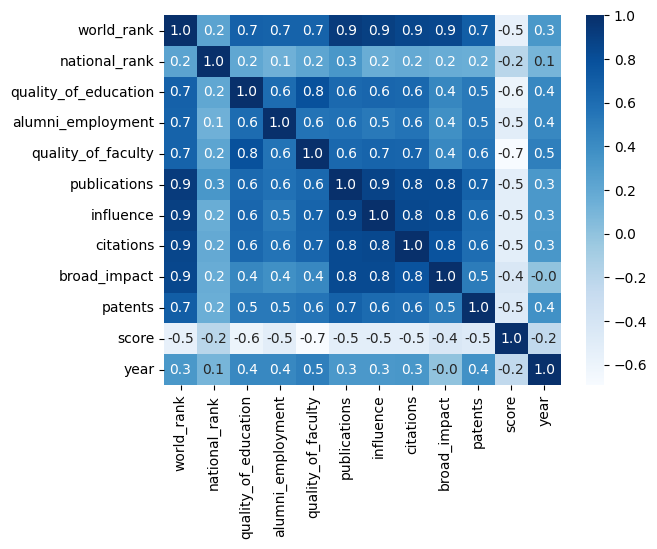

In [ ]:
sns.heatmap(dataF.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f');

Heatmap indicates stron relations between world rank and all other features except year, score and national rank

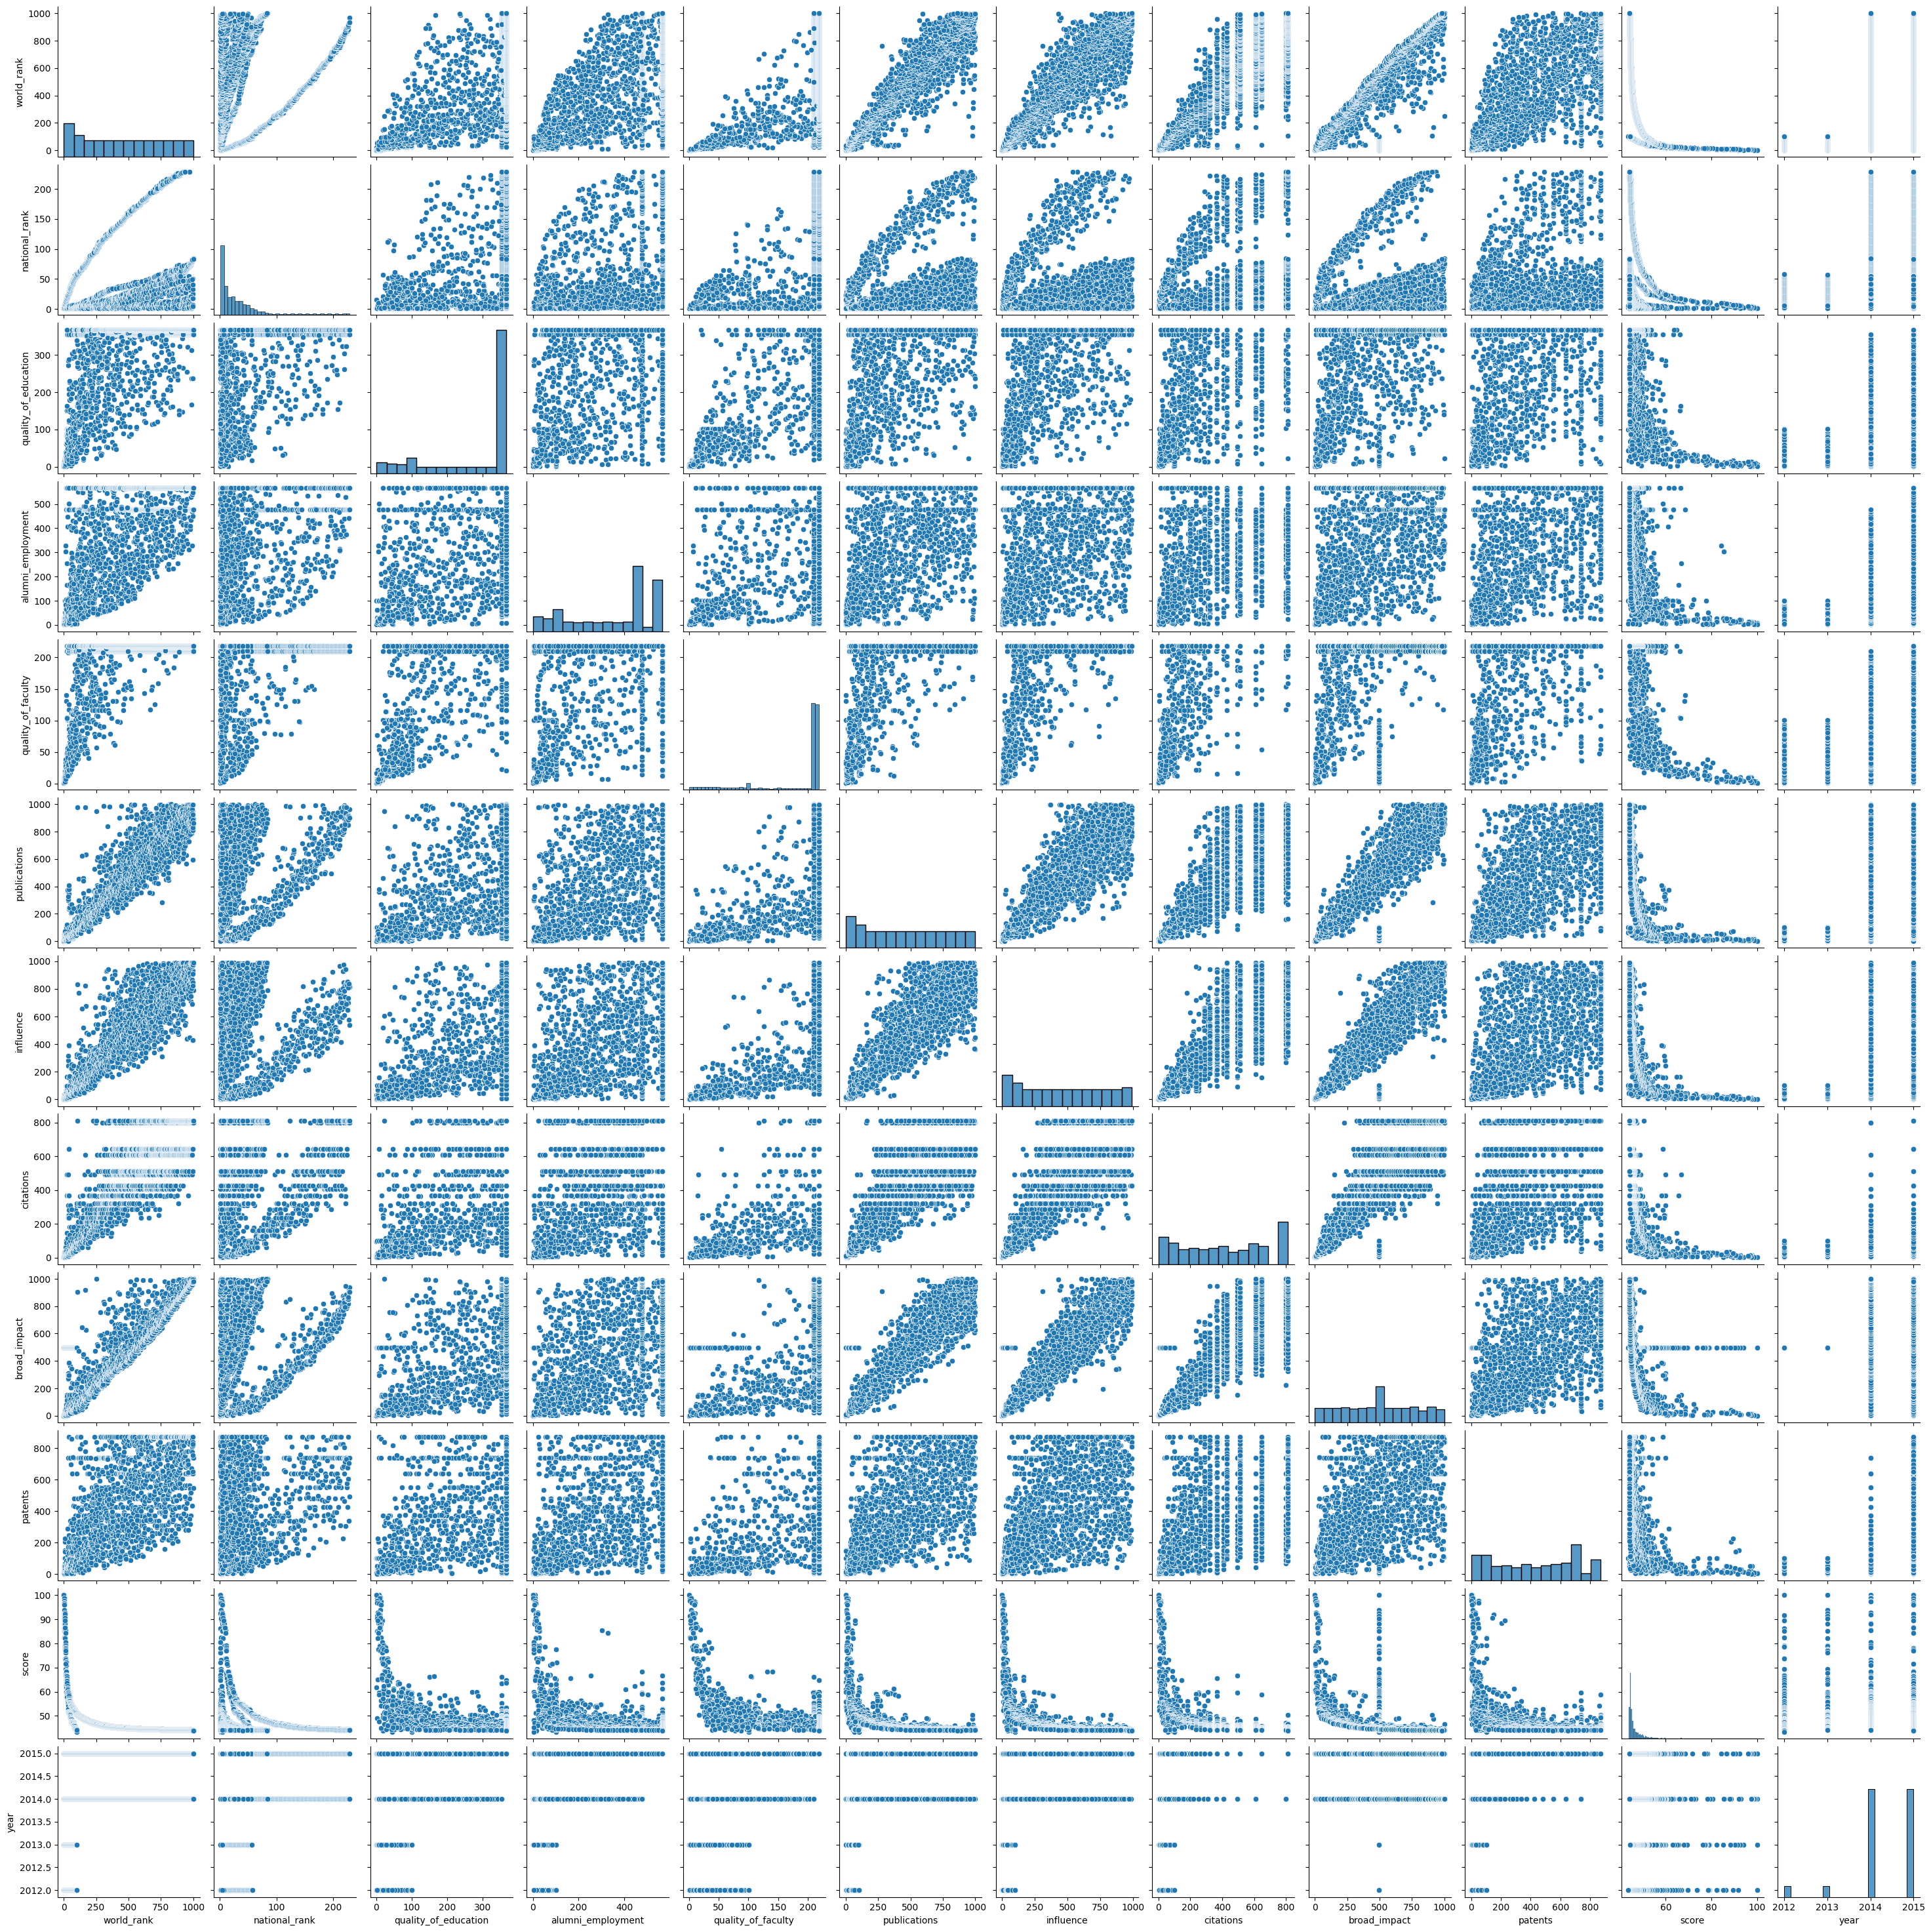

In [ ]:
sns.pairplot(dataF);

Scale the numerical data using StandardScaler.



Split the dataset into training and testing sets with an 80:20 split ratio.

Train a Random Forest Regressor on the training set.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
print(RFR.score(X_test,y_test))

0.9976420872850882


In this case, the R-squared score is 0.9974714127926412, which indicates that the RFR model fits the data very well. This is a high score, suggesting that the model is able to explain a large proportion of the variance in the test data. 

In [ ]:
y_predRFR = RFR.predict(X_test)

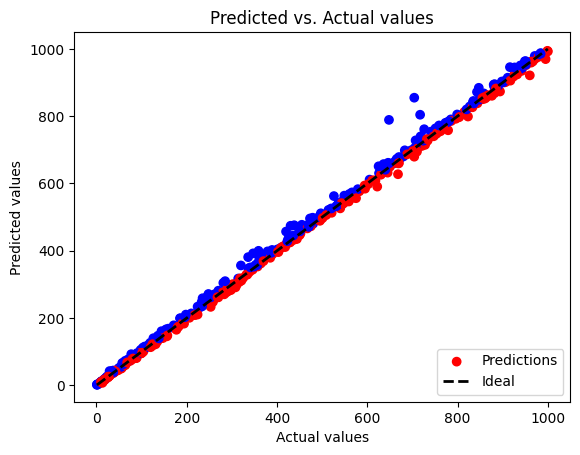

In [ ]:
# plot predicted vs. actual values with different colors and a legend
plt.scatter(y_test, y_predRFR, c=['b' if x < y else 'r' for x, y in zip(y_test, y_predRFR)], label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs. Actual values")
plt.legend(loc='lower right')



The graph indicates predicted values are nearly close to actual values 

In [ ]:
#Find the difference between predicted and actual values
EXP_2=pd.DataFrame(y_test)
EXP_2['Predicted RFR']=y_predRFR
EXP_2['Difference RFR']=abs(y_test-y_predRFR)
EXP_2

world_rank  Predicted RFR  Difference RFR
1124         925         923.91            1.09
235           36          40.25            4.25
585          386         387.36            1.36
1469         270         278.71            8.71
2066         867         860.88            6.12
...          ...            ...             ...
67            68          68.11            0.11
1650         451         456.62            5.62
1635         436         444.25            8.25
379          180         173.54            6.46
793          594         593.19            0.81

[440 rows x 3 columns]

In [ ]:
max(abs(y_test-y_predRFR))

163.12

<ipython-input-27-8299f74f6400>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_predRFR)


<Axes: xlabel='world_rank', ylabel='Density'>

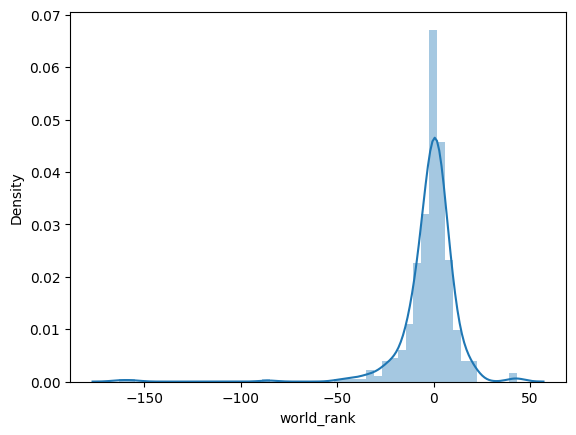

In [ ]:
sns.distplot(y_test - y_predRFR)

# Conclusion
The density plot shows the distribution of the residuals (the difference between the actual values and predicted values) of the random forest regression model. A well-performing model would have residuals that are normally distributed around 0. If the distribution is not centered around 0 and/or has a different shape (e.g. skewed), it could indicate that the model is not performing well and that there might be some underlying pattern that the model is not capturing.

In this case, the density plot shows that the residuals are approximately normally distributed around 0, which is a good sign. This suggests that the random forest model is performing well in predicting the target variable.